# XGBoost prueba 1

### Importamos las librerías

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import xgboost as xgb

### Leemos los archivos

In [16]:
df_train_labels = pd.read_csv('train_labels.csv')
df_train_values = pd.read_csv('train_values_FE.csv')

#### Eliminamos el building id para pdoer hacer las predicciones

In [17]:
df_train_labels_filtrados = df_train_labels.drop(['building_id'], axis=1)
df_train_values_filtrados = df_train_values.drop(['building_id'], axis=1)

#### Implementamos el algoritmo

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_train_values_filtrados, df_train_labels_filtrados, test_size=0.3, random_state=123)

In [19]:
xg_reg = xgb.XGBClassifier(objective ='multi:softprob', n_estimators = 600, max_depth = 8,     learning_rate = 0.1,     subsample = 1,     colsample_bytree=1)

In [20]:
xg_reg.fit(X_train, y_train)

C:\Users\gianc\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\gianc\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[16:37:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=600, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [21]:
preds = xg_reg.predict(X_test)

In [22]:
error = f1_score(y_test, preds, average='micro')
error

0.6991980148629462

### Error de entrenamiento

In [23]:
xg_reg.score(X_train, y_train)

0.7505262580857363

### Error de generalización o testing

In [24]:
xg_reg.score(X_test, y_test)

0.6991980148629462

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

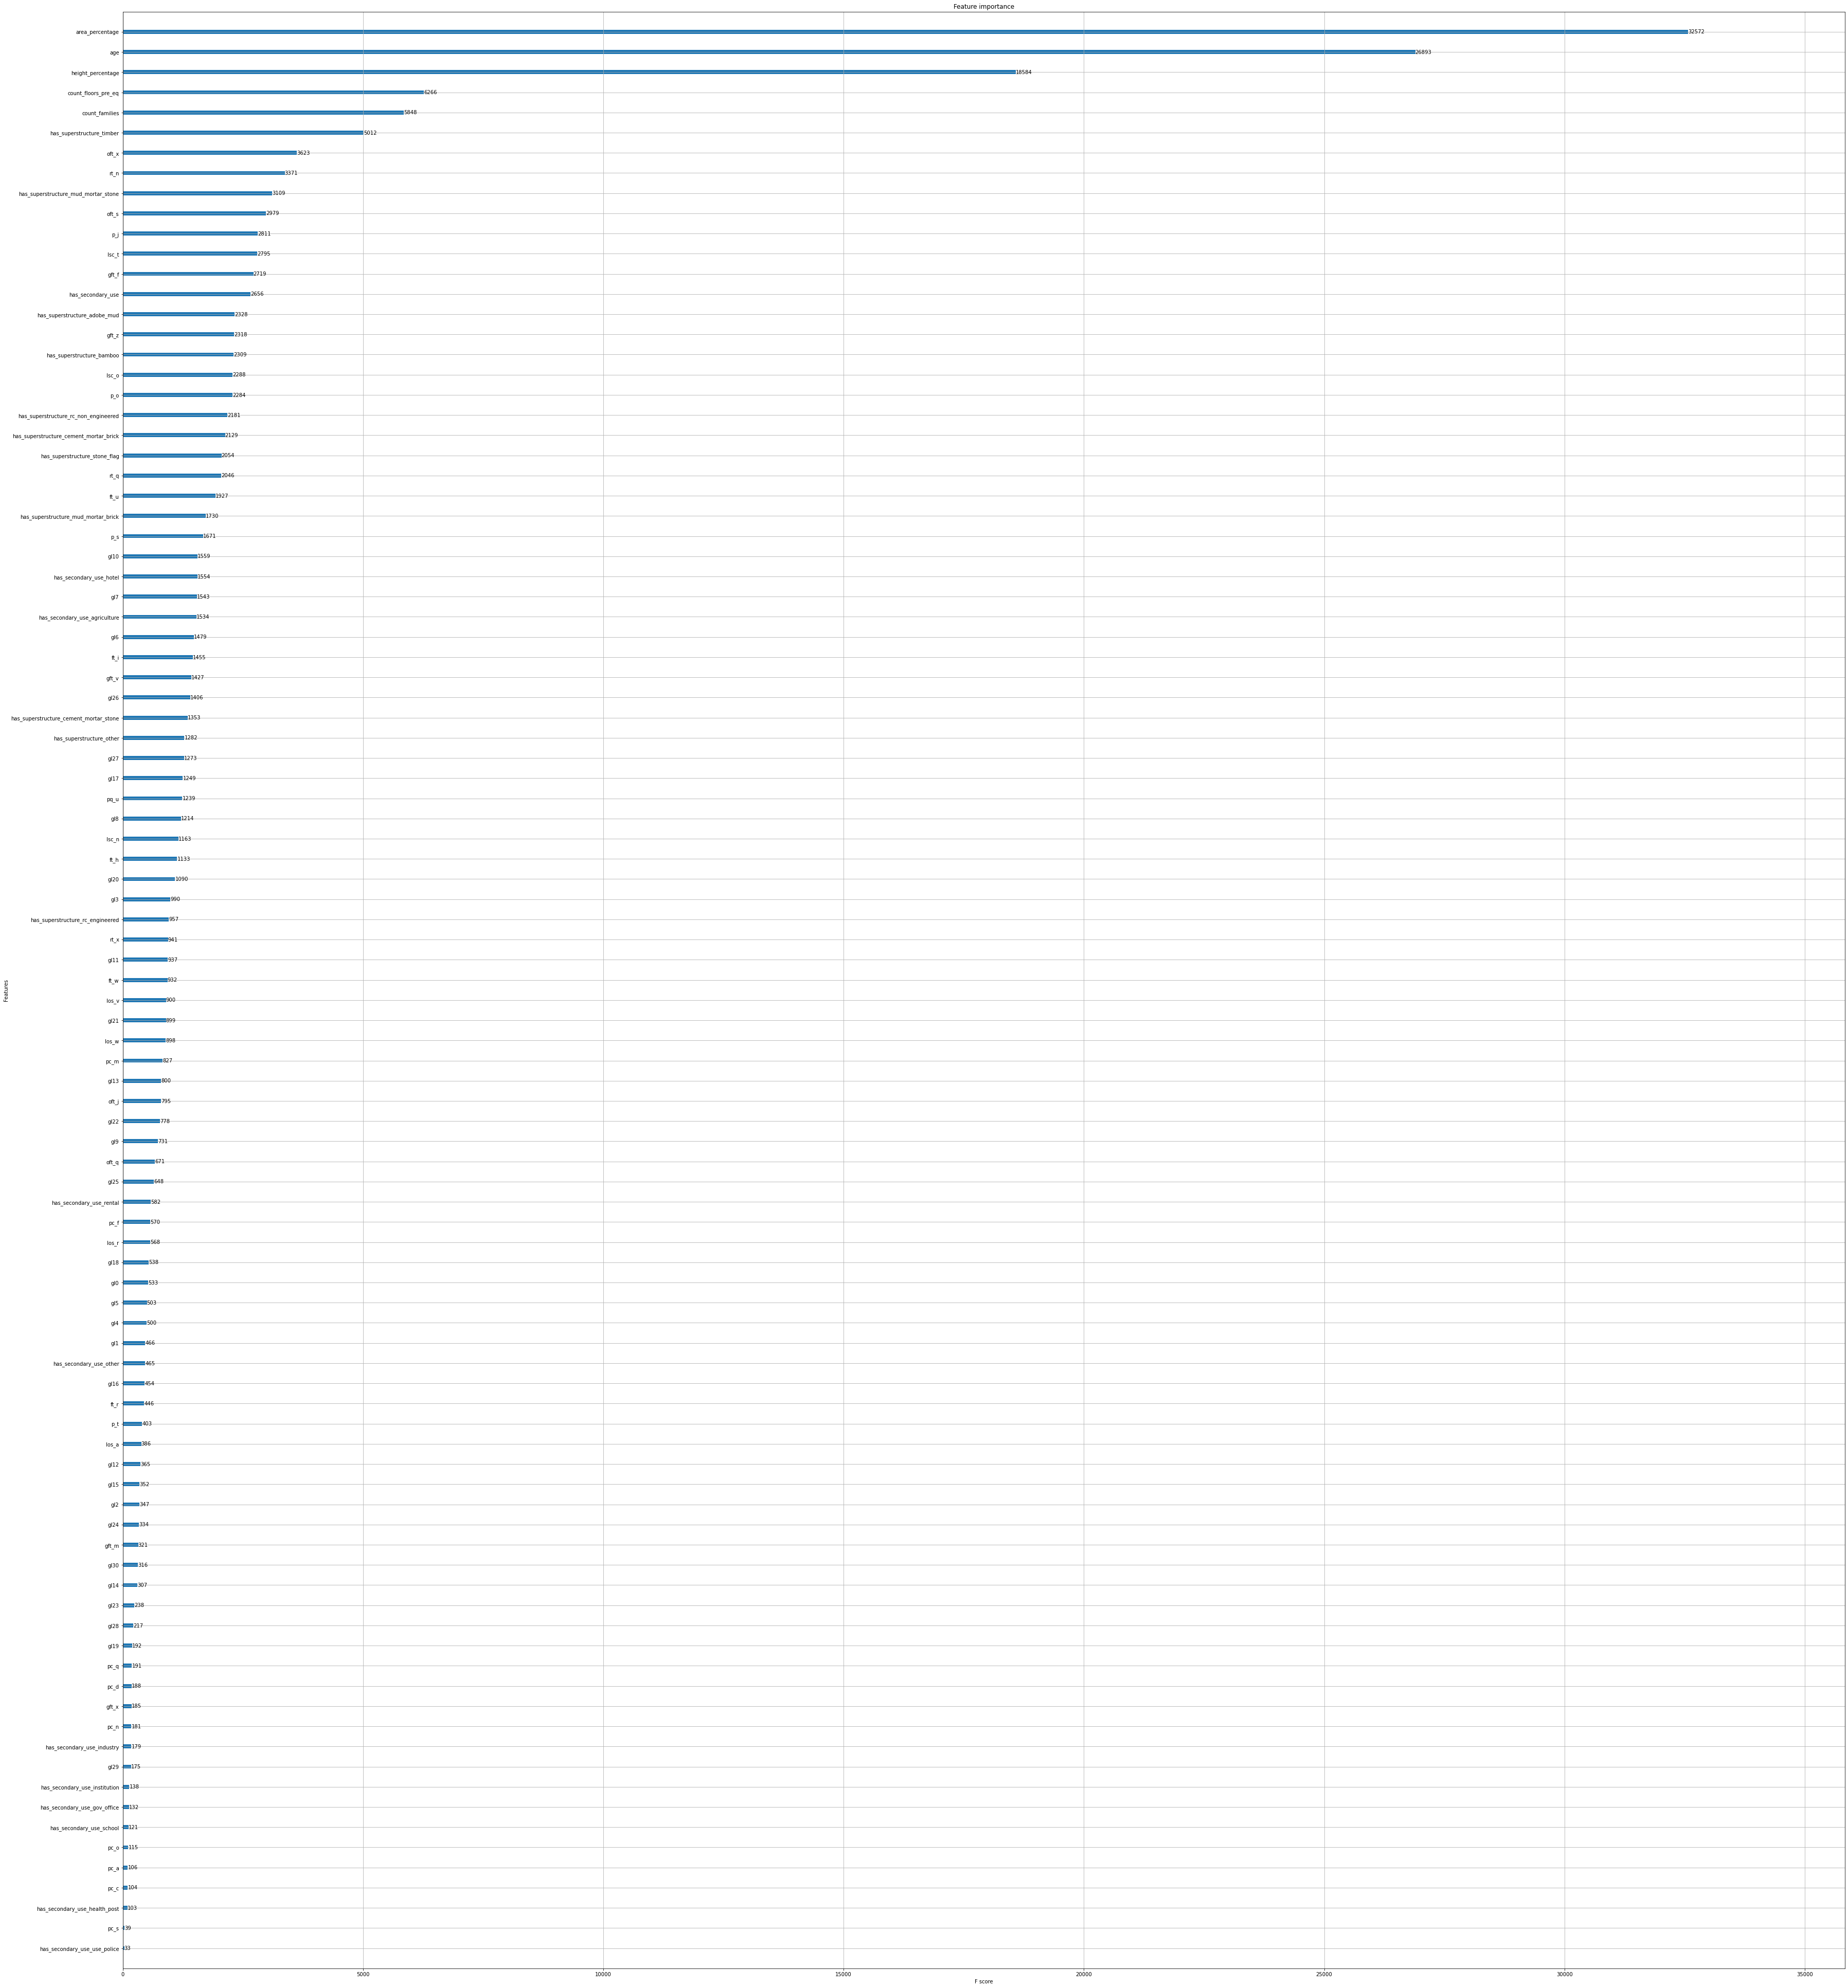

In [25]:
plt.rcParams['figure.figsize'] = [60, 70]
xgb.plot_importance(xg_reg)